In [ ]:
!pip install setuptools wheel
!pip install "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from autogluon.tabular import TabularPredictor

## Exploratory Data Analysis 

In [5]:
data = pd.read_csv("data/APPL_raw_data.csv", parse_dates=['Date'])
data['TP'] = data.apply(
    lambda x: np.mean(x[['High', 'Low', 'Close']]), axis=1
)

data['target'] = data.TP.shift(-1)
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6457 entries, 0 to 6456
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          6457 non-null   datetime64[ns]
 1   Open          6457 non-null   float64       
 2   High          6457 non-null   float64       
 3   Low           6457 non-null   float64       
 4   Close         6457 non-null   float64       
 5   Volume        6457 non-null   int64         
 6   Dividends     6457 non-null   float64       
 7   Stock Splits  6457 non-null   float64       
 8   CPIAUCSL      6457 non-null   float64       
 9   FEDFUNDS      6457 non-null   float64       
 10  TP            6457 non-null   float64       
 11  target        6457 non-null   float64       
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 655.8 KB


## Data Prepartion

In order not to overfit our model, we split the data into train and test linearly by timeline instead of sampling. 

In [29]:
DAYS_FOR_TESTING = 60

def split_data(data):
    return data.iloc[:-DAYS_FOR_TESTING, :], data.iloc[-DAYS_FOR_TESTING:, :]

In [32]:
train, test = split_data(data)
train.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,CPIAUCSL,FEDFUNDS,TP,target
0,1997-01-02,0.161046,0.161999,0.158188,0.160093,143113600,0.0,0.0,159.4,5.25,0.160093,0.165176
1,1997-01-03,0.161046,0.169623,0.160093,0.165811,119716800,0.0,0.0,159.4,5.25,0.165176,0.135873
2,1997-01-06,0.134364,0.139843,0.131506,0.136270,1882832000,0.0,0.0,159.4,5.25,0.135873,0.135317
3,1997-01-07,0.138176,0.139129,0.133411,0.133411,976931200,0.0,0.0,159.4,5.25,0.135317,0.135635
4,1997-01-08,0.139128,0.140082,0.132458,0.134364,1100131200,0.0,0.0,159.4,5.25,0.135635,0.134999


In [31]:
train.shape, test.shape

((6397, 12), (60, 12))

In [33]:
predictor = TabularPredictor(label='target', eval_metric='root_mean_squared_error').fit(train, time_limit=600, presets='best_quality')
predictor.fit_summary()

No path specified. Models will be saved in: "AutogluonModels/ag-20220830_144005/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220830_144005/"
AutoGluon Version:  0.5.2
Python Version:     3.7.10
Operating System:   Linux
Train Data Rows:    6397
Train Data Columns: 11
Label Column: target
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (180.12130413520288, 0.0995818702463001, 22.70614, 37.53803)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2  -0.601848       1.028366   74.496679                0.000979           0.617496            2       True         11
1    KNeighborsDist_BAG_L1  -0.646593       0.208358    0.027690                0.208358           0.027690            1       True          2
2      WeightedEnsemble_L3  -0.674030      10.875937  471.012087                0.001172           0.436551            3       True         17
3   RandomForestMSE_BAG_L2  -0.682916       9.016930  401.203054                0.336651          19.987697            2       True         14
4     ExtraTreesMSE_BAG_L2  -0.689178       9.115702  388.510974                0.435423           7.295617            2       True         16
5    KNeighborsUnif_BAG_L1  -0.722075       0.104251    0.030445                

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -0.722075

In [34]:
test['prediction'] = predictor.predict(test)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Date'>

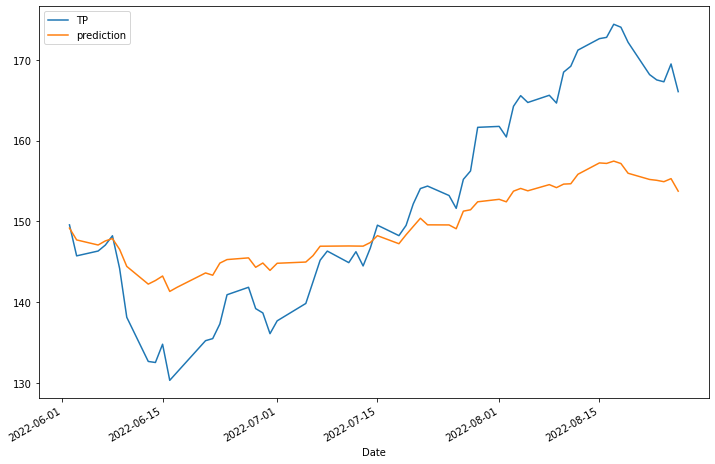

In [35]:
test.plot(x='Date', y=['TP', 'prediction'], kind='line', figsize=(12,8))

## Traning Evaluation

In [8]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
df_rf = data[['Date', 'TP']]
df_rf = df_rf.set_index('Date')
df_rf.head()

,TP
Date,
1997-01-02,0.160093
1997-01-03,0.165176
1997-01-06,0.135873
1997-01-07,0.135317
1997-01-08,0.135635


In [23]:
# Applying the diff to the data
df_rf["TP_diff"] = df_rf.diff()

# Creating 10 lags for starting
for i in range (5, 0, -1):
    df_rf['t-' + str(i)] = df_rf.TP.shift(i)

# Moving Avg of 2 weeks
df_rf["rolling"] = df_rf.TP.rolling(window = 14).mean()
    
df_rf.dropna(inplace = True)
df_rf.head()

,TP,TP_diff,t-5,t-4,t-3,t-2,t-1,rolling
Date,,,,,,,,
1997-01-21,0.130553,0.001429,0.137223,0.133094,0.128329,0.128329,0.129123,0.137887
1997-01-22,0.131347,0.000794,0.133094,0.128329,0.128329,0.129123,0.130553,0.135833
1997-01-23,0.131505,0.000159,0.128329,0.128329,0.129123,0.130553,0.131347,0.133428
1997-01-24,0.129600,-0.001906,0.128329,0.129123,0.130553,0.131347,0.131505,0.132980
1997-01-27,0.128329,-0.001271,0.129123,0.130553,0.131347,0.131505,0.129600,0.132481


In [36]:
train_rf, test_rf = split_data(df_rf)
train_rf.shape, test_rf.shape

((6384, 8), (60, 8))

In [51]:
x_train_rf, y_train_rf = train_rf.loc[:, train_rf.columns != 'TP'], train_rf['TP']

x_test_rf, y_test_rf = test_rf.loc[:, test_rf.columns != 'TP'], test_rf['TP']

In [52]:
# Instanciating a Regressor and Training
regressor_rf = RandomForestRegressor(n_estimators = 1000)

# Training
regressor_rf.fit(x_train_rf, y_train_rf)

RandomForestRegressor(n_estimators=1000)

In [70]:
result_rf = pd.DataFrame(test_rf['TP'])
result_rf.head()

,TP
Date,
2022-06-02,149.572240
2022-06-03,145.734239
2022-06-06,146.333404
2022-06-07,147.065718
2022-06-08,148.224120


<AxesSubplot:xlabel='Date'>

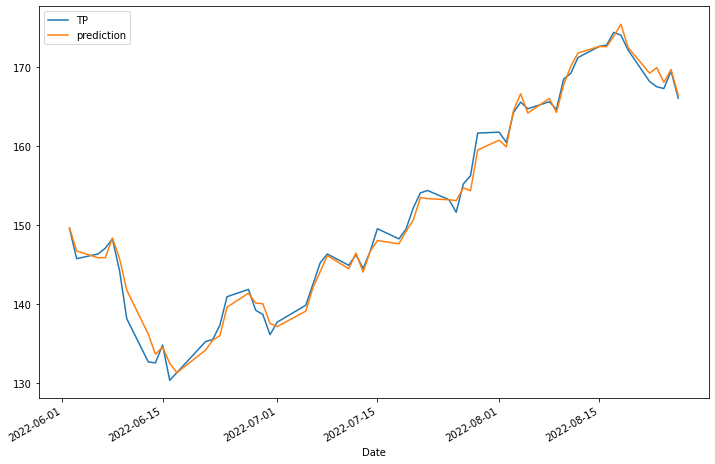

In [73]:
prediction_rf = regressor_rf.predict(x_test_rf)

result_rf['prediction'] = prediction_rf
# result_rf.plot(x='Date', y=['TP', 'prediction'], kind='line', figsize=(12,8))
result_rf.plot(figsize=(12,8))